In [90]:
import seaborn as sns
import pandas as pd
import matplotlib.pyplot as plt

df = pd.DataFrame(sns.load_dataset("diamonds"))

print(f"The shape of the dataset is {df.shape}")
if df.isnull().any().any():
  print(f"There are missing values in the dataset")
else:
  print(f"There are no missing values in the dataset")

print(df.head())

print(df.describe())

The shape of the dataset is (53940, 10)
There are no missing values in the dataset
   carat      cut color clarity  depth  table  price     x     y     z
0   0.23    Ideal     E     SI2   61.5   55.0    326  3.95  3.98  2.43
1   0.21  Premium     E     SI1   59.8   61.0    326  3.89  3.84  2.31
2   0.23     Good     E     VS1   56.9   65.0    327  4.05  4.07  2.31
3   0.29  Premium     I     VS2   62.4   58.0    334  4.20  4.23  2.63
4   0.31     Good     J     SI2   63.3   58.0    335  4.34  4.35  2.75
              carat         depth         table         price             x  \
count  53940.000000  53940.000000  53940.000000  53940.000000  53940.000000   
mean       0.797940     61.749405     57.457184   3932.799722      5.731157   
std        0.474011      1.432621      2.234491   3989.439738      1.121761   
min        0.200000     43.000000     43.000000    326.000000      0.000000   
25%        0.400000     61.000000     56.000000    950.000000      4.710000   
50%        0.7000

In [91]:
print(df.clarity.value_counts())

print(df.cut.value_counts())

print(df.color.value_counts())

clarity
SI1     13065
VS2     12258
SI2      9194
VS1      8171
VVS2     5066
VVS1     3655
IF       1790
I1        741
Name: count, dtype: int64
cut
Ideal        21551
Premium      13791
Very Good    12082
Good          4906
Fair          1610
Name: count, dtype: int64
color
G    11292
E     9797
F     9542
H     8304
D     6775
I     5422
J     2808
Name: count, dtype: int64


In [92]:
categorical_features = ["cut", "color", "clarity"]
df = pd.get_dummies(df, columns=categorical_features)
df.head()

,carat,depth,table,price,x,y,z,cut_Ideal,cut_Premium,cut_Very Good,...,color_I,color_J,clarity_IF,clarity_VVS1,clarity_VVS2,clarity_VS1,clarity_VS2,clarity_SI1,clarity_SI2,clarity_I1
0,0.23,61.5,55.0,326,3.95,3.98,2.43,True,False,False,...,False,False,False,False,False,False,False,False,True,False
1,0.21,59.8,61.0,326,3.89,3.84,2.31,False,True,False,...,False,False,False,False,False,False,False,True,False,False
2,0.23,56.9,65.0,327,4.05,4.07,2.31,False,False,False,...,False,False,False,False,False,True,False,False,False,False
3,0.29,62.4,58.0,334,4.20,4.23,2.63,False,True,False,...,True,False,False,False,False,False,True,False,False,False
4,0.31,63.3,58.0,335,4.34,4.35,2.75,False,False,False,...,False,True,False,False,False,False,False,False,True,False


In [93]:
columns = df.columns.tolist()
columns.insert(len(columns), columns.pop(columns.index("price")))
df = df.loc[:, columns]
df.head()

,carat,depth,table,x,y,z,cut_Ideal,cut_Premium,cut_Very Good,cut_Good,...,color_J,clarity_IF,clarity_VVS1,clarity_VVS2,clarity_VS1,clarity_VS2,clarity_SI1,clarity_SI2,clarity_I1,price
0,0.23,61.5,55.0,3.95,3.98,2.43,True,False,False,False,...,False,False,False,False,False,False,False,True,False,326
1,0.21,59.8,61.0,3.89,3.84,2.31,False,True,False,False,...,False,False,False,False,False,False,True,False,False,326
2,0.23,56.9,65.0,4.05,4.07,2.31,False,False,False,True,...,False,False,False,False,True,False,False,False,False,327
3,0.29,62.4,58.0,4.20,4.23,2.63,False,True,False,False,...,False,False,False,False,False,True,False,False,False,334
4,0.31,63.3,58.0,4.34,4.35,2.75,False,False,False,True,...,True,False,False,False,False,False,False,True,False,335


Building the predictive model

In [94]:
X = df.iloc[:, :-1]
X.head()

,carat,depth,table,x,y,z,cut_Ideal,cut_Premium,cut_Very Good,cut_Good,...,color_I,color_J,clarity_IF,clarity_VVS1,clarity_VVS2,clarity_VS1,clarity_VS2,clarity_SI1,clarity_SI2,clarity_I1
0,0.23,61.5,55.0,3.95,3.98,2.43,True,False,False,False,...,False,False,False,False,False,False,False,False,True,False
1,0.21,59.8,61.0,3.89,3.84,2.31,False,True,False,False,...,False,False,False,False,False,False,False,True,False,False
2,0.23,56.9,65.0,4.05,4.07,2.31,False,False,False,True,...,False,False,False,False,False,True,False,False,False,False
3,0.29,62.4,58.0,4.20,4.23,2.63,False,True,False,False,...,True,False,False,False,False,False,True,False,False,False
4,0.31,63.3,58.0,4.34,4.35,2.75,False,False,False,True,...,False,True,False,False,False,False,False,False,True,False


In [95]:
y = df.iloc[:, (len(df.columns.tolist()) - 1)]
y.head()

0    326
1    326
2    327
3    334
4    335
Name: price, dtype: int64

In [96]:
from sklearn.model_selection import cross_val_score
from sklearn import linear_model
from sklearn.metrics import mean_squared_error
from sklearn.metrics import make_scorer
from sklearn.model_selection import KFold

cv_model = linear_model.LinearRegression()
cv_scores = cross_val_score(cv_model, X, y, scoring=make_scorer(mean_squared_error, greater_is_better=True), cv=KFold(n_splits=10, shuffle=True, random_state=1337))

print(f"***** Cross Validation summary *****")
for v in range(0, len(cv_scores)):
  print(f"MSE score on fold {v+1} = {cv_scores[v]}")

***** Cross Validation summary *****
MSE score on fold 1 = 1260294.0424545791
MSE score on fold 2 = 1186522.559603263
MSE score on fold 3 = 1375720.074388209
MSE score on fold 4 = 1229242.1991188126
MSE score on fold 5 = 1339596.6305964962
MSE score on fold 6 = 1318081.3545870557
MSE score on fold 7 = 1416714.8143886726
MSE score on fold 8 = 1286407.43503198
MSE score on fold 9 = 1204715.5107063404
MSE score on fold 10 = 1183615.6495643307


Mean Squared Error (MSE) = 1280091.027043974


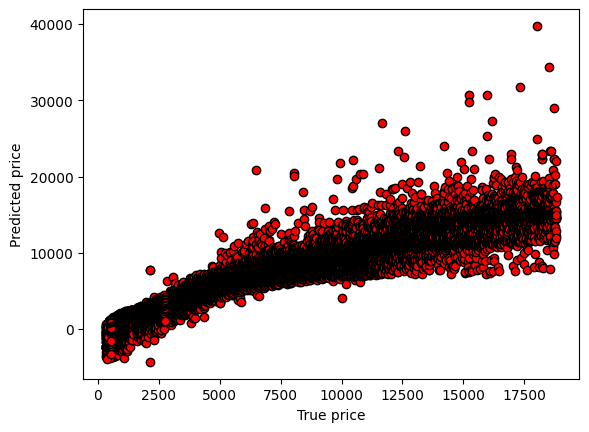

In [97]:
from sklearn.model_selection import cross_val_predict

cv_model = linear_model.LinearRegression()
price_y_pred_cv = cross_val_predict(cv_model, X, y, cv=KFold(n_splits=10, shuffle=True, random_state=1337))

def evaluate(true_values, predicted_values):
  print(f"Mean Squared Error (MSE) = {mean_squared_error(true_values, predicted_values)}")

def plot_true_vs_predicted(y_true, y_predicted):
  fig, ax = plt.subplots()
  ax.scatter(y_true, y_predicted, edgecolors=(0,0,0), color="red")
  ax.plot([y_true.min(), y_true.max()], [y_true.min(), y_true.max()], "k--", lw=4)
  ax.set_xlabel("True price")
  ax.set_ylabel("Predicted price")

evaluate(y, price_y_pred_cv)
plot_true_vs_predicted(y, price_y_pred_cv)

In [98]:
from sklearn.model_selection import cross_val_predict

cv_model = linear_model.LinearRegression()
price_y_pred_cv = cross_val_predict(cv_model, X, y, cv=X.shape[0])
evaluate(y, price_y_pred_cv)
plot_true_vs_predicted(y, price_y_pred_cv)

KeyboardInterrupt: 